<a href="https://colab.research.google.com/github/hetkothari/Telecom-Churn-Capstone-1/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Copy of Telecom Churn.csv")

In [ ]:
data.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [ ]:
print("Number of rows is: ", data.shape[0])
print("Number of columns is: ", data.shape[1])

Number of rows is:  3333
Number of columns is:  20


In [ ]:
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [ ]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
data['Churn'].describe()

count      3333
unique        2
top       False
freq       2850
Name: Churn, dtype: object

In [ ]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
data['International plan'].describe()


count     3333
unique       2
top         No
freq      3010
Name: International plan, dtype: object

In [ ]:
data['Voice mail plan'].describe()

count     3333
unique       2
top         No
freq      2411
Name: Voice mail plan, dtype: object

In [ ]:
def tobool(x):
  if x=="Yes":
    return True
  else:
    return False

In [ ]:
data['International plan']=data['International plan'].apply(tobool).convert_dtypes()
data['International plan']



0       False
1       False
2       False
3        True
4        True
        ...  
3328    False
3329    False
3330    False
3331     True
3332    False
Name: International plan, Length: 3333, dtype: boolean

In [ ]:
data["Voice mail plan"]=data["Voice mail plan"].apply(tobool).convert_dtypes()
data["Voice mail plan"]

0        True
1        True
2       False
3       False
4       False
        ...  
3328     True
3329    False
3330    False
3331    False
3332     True
Name: Voice mail plan, Length: 3333, dtype: boolean

In [ ]:
data["Total charge"]= data["Total intl charge"]+data["Total night charge"]+data["Total eve charge"]+data["Total day charge"]
data["Total charge"].describe()

count    3333.000000
mean       59.449754
std        10.502261
min        22.930000
25%        52.380000
50%        59.470000
75%        66.480000
max        96.150000
Name: Total charge, dtype: float64

In [ ]:
data["Total minutes"]= data["Total intl minutes"]+data["Total night minutes"]+data["Total eve minutes"]+data["Total day minutes"]
data["Total minutes"].describe()

count    3333.000000
mean      591.864776
std        89.954251
min       284.300000
25%       531.500000
50%       593.600000
75%       652.400000
max       885.000000
Name: Total minutes, dtype: float64

In [ ]:
data["Per minute Charge"]= data["Total charge"]/data["Total minutes"]
data["Per minute Charge"].describe()


count    3333.000000
mean        0.100354
std         0.008440
min         0.066950
25%         0.094893
50%         0.100385
75%         0.106056
max         0.129791
Name: Per minute Charge, dtype: float64

In [33]:
from sklearn.preprocessing import minmax_scale
data["Per minute Charge"]= minmax_scale(data["Per minute Charge"])
data["Per minute Charge"].describe()

count    3333.000000
mean        0.531560
std         0.134309
min         0.000000
25%         0.444649
50%         0.532054
75%         0.622289
max         1.000000
Name: Per minute Charge, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


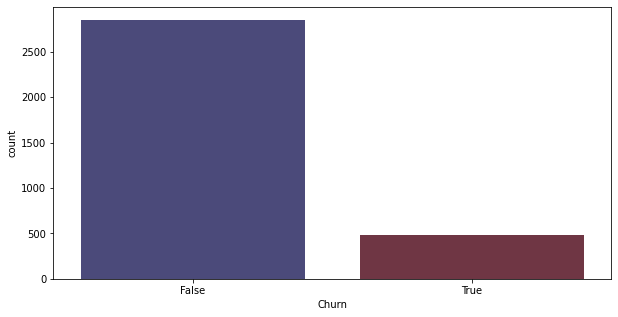

In [49]:
plt.figure(figsize = (10,5))
sns.countplot(data['Churn'],palette="icefire")
plt.xlabel('Churn')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


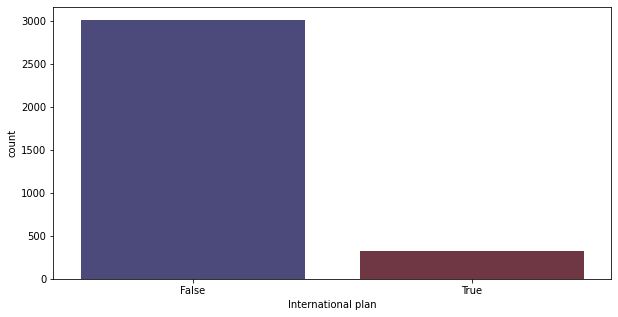

In [58]:
plt.figure(figsize = (10,5))
sns.countplot(data['International plan'],palette="icefire")
plt.xlabel('International plan')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


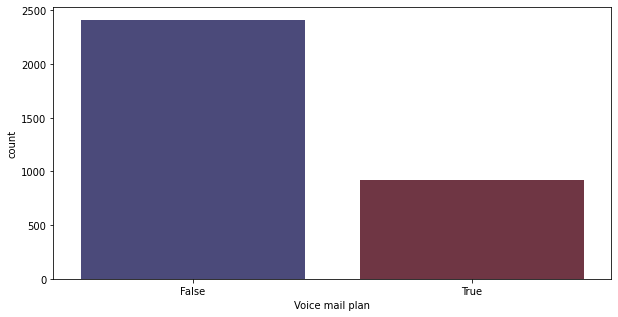

In [60]:
plt.figure(figsize = (10,5))
sns.countplot(data['Voice mail plan'],palette="icefire")
plt.xlabel('Voice mail plan')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


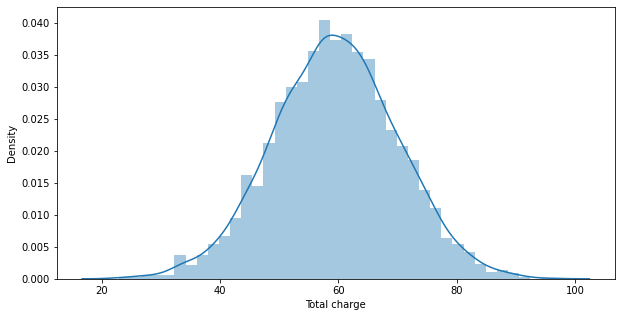

In [52]:
plt.figure(figsize = (10,5))
sns.distplot(data["Total charge"])
plt.xlabel('Total charge')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


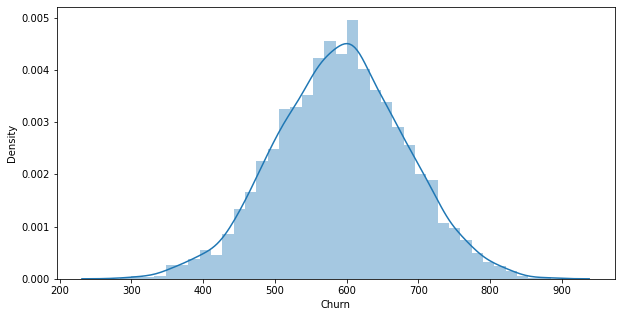

In [53]:
plt.figure(figsize = (10,5))
sns.distplot(data["Total minutes"])
plt.xlabel('Total minutes')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


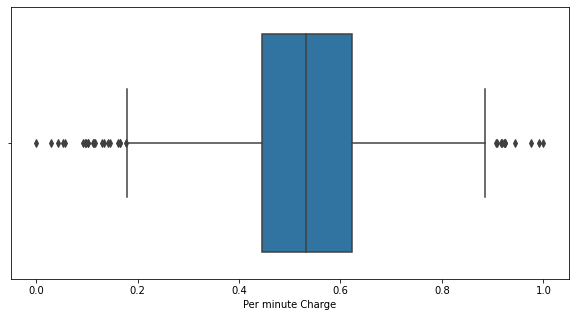

In [61]:
plt.figure(figsize = (10,5))
sns.boxplot(data["Per minute Charge"])
plt.xlabel('Per minute Charge')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


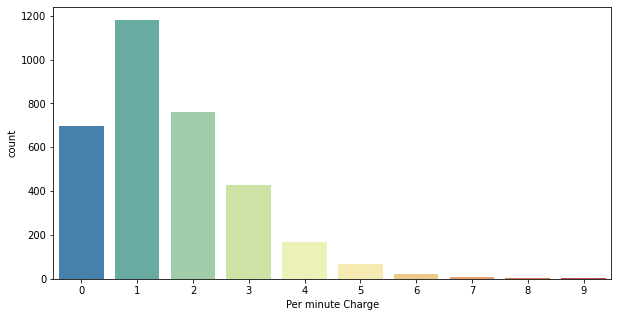

In [71]:
plt.figure(figsize = (10,5))
sns.countplot(data["Customer service calls"],palette="Spectral_r")
plt.xlabel('Per minute Charge')
plt.show()

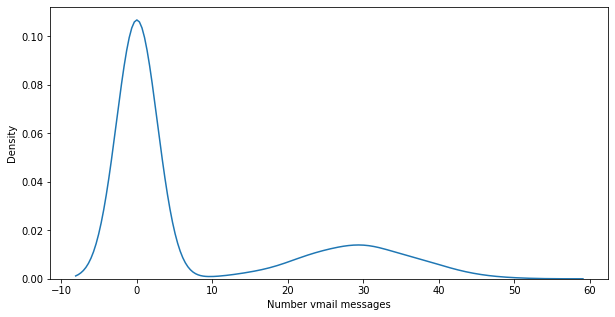

In [76]:
plt.figure(figsize = (10,5))
sns.kdeplot(data["Number vmail messages"])
plt.xlabel('Number vmail messages')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


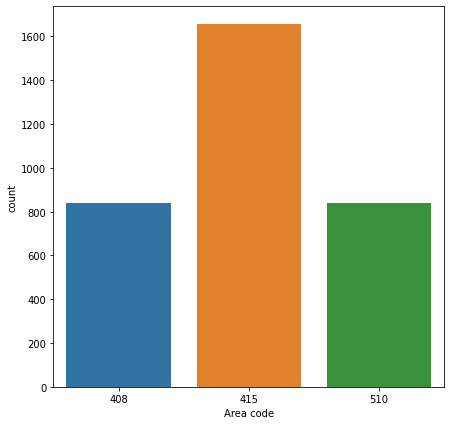

In [92]:
plt.figure(figsize = (7,7))
sns.countplot(data["Area code"],)
plt.show()

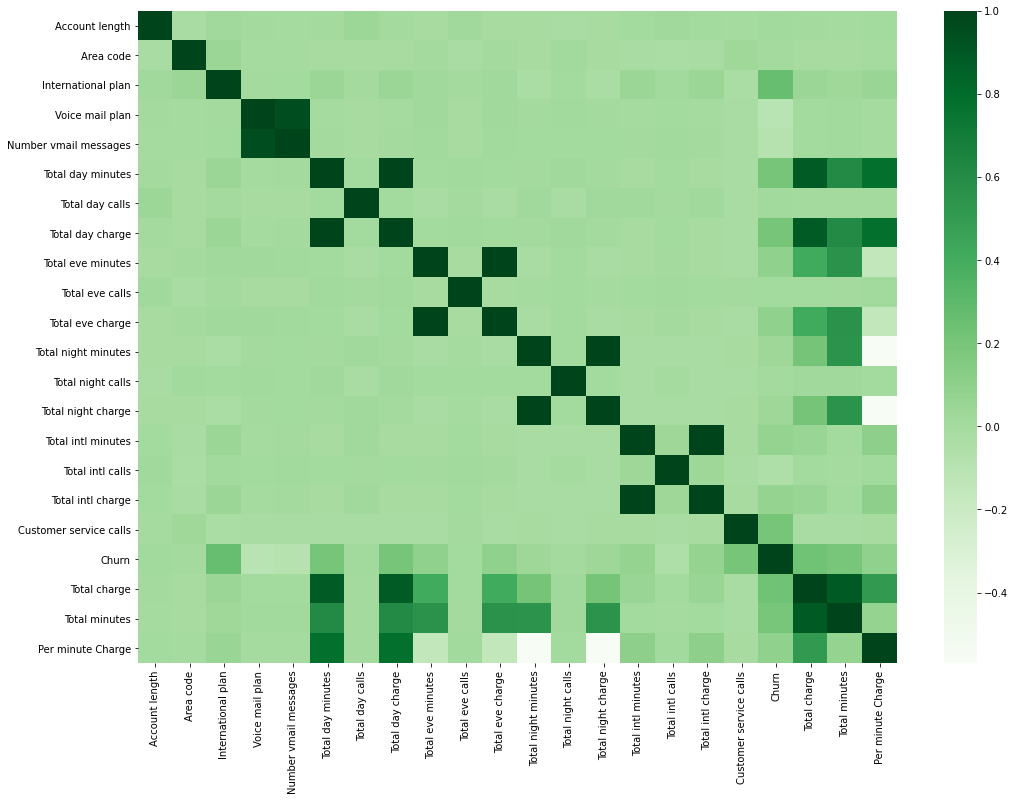

In [95]:
plt.figure(figsize = (17,12))
correlation=data.corr()
sns.heatmap(correlation,cmap="Greens")


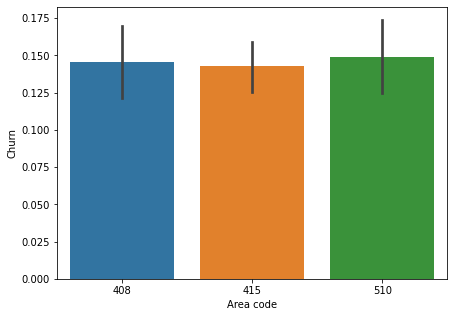

In [100]:
plt.figure(figsize=(7,5))
sns.barplot(x='Area code',y='Churn', data=data)

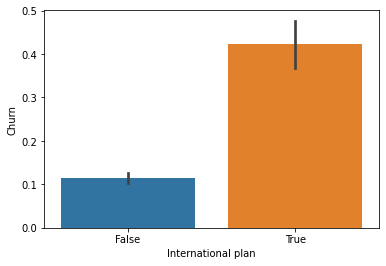

In [102]:
sns.barplot(x='International plan', y='Churn', data=data)

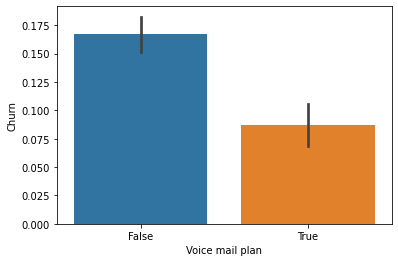

In [104]:
sns.barplot(x='Voice mail plan', y='Churn', data=data)

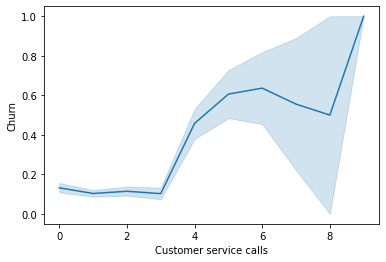

In [141]:
sns.lineplot(x='Customer service calls',y='Churn',data=data)

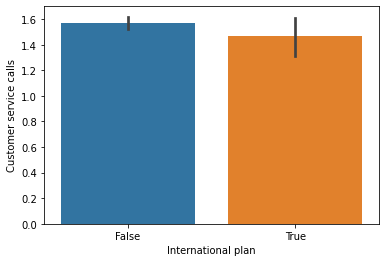

In [137]:
sns.barplot(x='International plan', y='Customer service calls', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


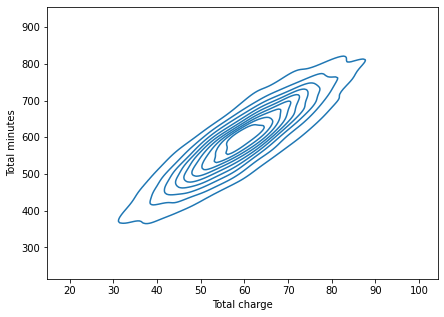

In [115]:
plt.figure(figsize=(7,5))
sns.kdeplot(data['Total charge'] ,data["Total minutes"])

<Figure size 504x360 with 0 Axes>

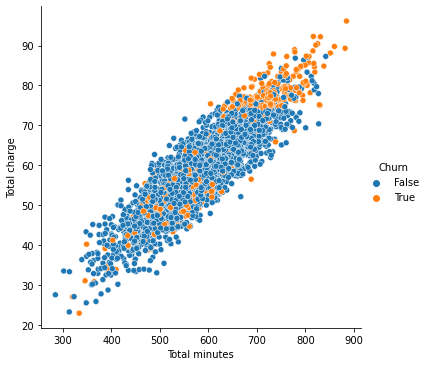

In [166]:
plt.figure(figsize=(7,5))
sns.relplot(x="Total minutes",y ="Total charge",hue = "Churn", data = data)

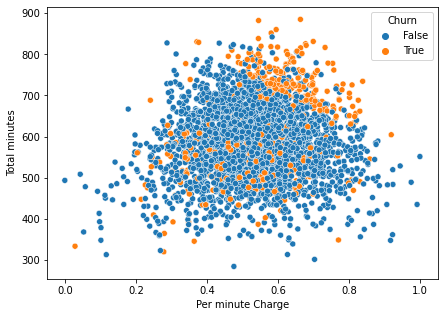

In [168]:
plt.figure(figsize=(7,5))
sns.scatterplot(y="Total minutes",x ="Per minute Charge",hue = "Churn" ,data = data)